In [1]:
import os
os.chdir("../../..")
import jax
jax.devices()

[CpuDevice(id=0)]

In [2]:
from scripts.nj.neurosci import *
import scripts.nj.graph_to_arrays as ga
import scripts.data_preparation as dp
import networkx as nx

d:\Iliuha_projects\neurosci\bbab\Drosophila-Larvae-Simulation\.venv_jax\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Получаем данные

In [3]:
neurons_ids = [
    "7055857",
    "1805418",
    "14260575",
    "5835799",
    "10160250",
    "7840203",
    "5019924",
    "13986477",
    "10167078",
    "7982896",
    "4119387",
    "17591442",
    "4227544",
    "10495502",
    "8069478",
    "3913629",
    "11279244",
    "16846805",
    "8980589",
    "3664102",
]

DIR = "Ilya/trash/del_this_syn"
neurons_ids = [int(i) for i in neurons_ids]
sc = dp.simulation_context(DIR, neurons_ids)
sc.build_full_graph()
full_g = nx.read_gml(sc.path_to_full_graph)

In [4]:
jc = ga.SimulationContextJax(graph = full_g, node_type_groups = {
    'cable':['branch', 'root', 'slab', 'end'],
    'alpha':['connector']
}, edge_directedness={'cable': {'cable': False},}, initial_node_values={
    'cable':1.0
}, cache_dir=DIR + '/jax')

   Загружено: 2 групп, 3 массивов ребер.
1. Данные графа успешно загружены из кэша.
2. Инициализация начальных массивов состояний узлов...
Контекст симуляции JAX готов.


In [5]:
res = jc.get_context()
res

{'num_nodes': {'cable': 14409, 'alpha': 7474},
 'initial_states': {'cable': array([1., 1., 1., ..., 1., 1., 1.], shape=(14409,), dtype=float32)},
 'edges_cable_to_cable': array([[ 1314,  4156, 13875, ..., 12732,  9124, 11722],
        [ 1177,  7723, 13877, ..., 12731,  9126,  2480]],
       shape=(2, 28778), dtype=int32),
 'edges_cable_to_alpha': array([[10090, 10081, 11221, ...,  9511,  9509,  9258],
        [ 7121,  6315,  6032, ...,  5546,   919,  3390]],
       shape=(2, 2018), dtype=int32),
 'edges_alpha_to_cable': array([[ 5599,  5651,  5659, ...,  5201,  5269,  5321],
        [ 9692,  9772, 12902, ...,  5632,  9639,  9605]],
       shape=(2, 7182), dtype=int32)}

In [6]:
local_indeces_mapping = jc.get_node_id_mapping()
local_indeces_mapping

{'cable': {'10020228': 0,
  '10020418': 1,
  '10021476': 2,
  '10021563': 3,
  '10033214': 4,
  '10033247': 5,
  '10033258': 6,
  '10033289': 7,
  '10033740': 8,
  '10035141': 9,
  '10035234': 10,
  '10035285': 11,
  '10035395': 12,
  '10035583': 13,
  '10036070': 14,
  '10036263': 15,
  '10037487': 16,
  '10038822': 17,
  '10043753': 18,
  '10043760': 19,
  '10043878': 20,
  '10043903': 21,
  '10048711': 22,
  '10048774': 23,
  '10049357': 24,
  '10049412': 25,
  '10049601': 26,
  '10049821': 27,
  '10049969': 28,
  '10050575': 29,
  '10064460': 30,
  '10064488': 31,
  '10064614': 32,
  '10064615': 33,
  '10064652': 34,
  '10064656': 35,
  '10064670': 36,
  '10064683': 37,
  '10064717': 38,
  '10064718': 39,
  '10064725': 40,
  '10064784': 41,
  '10064842': 42,
  '10064872': 43,
  '10064929': 44,
  '10064986': 45,
  '10064995': 46,
  '10065005': 47,
  '10065072': 48,
  '10065119': 49,
  '10065128': 50,
  '10065169': 51,
  '10065171': 52,
  '10072431': 53,
  '10073068': 54,
  '10073077

In [7]:
metadata = sc.node_metadata
metadata

,Unnamed: 0,node_id,x,y,z,radius,type,neuron_id
0,0,63677626,32602.500000,30946.400391,38700.0,NaN,end,7055857
1,1,63677625,82222.101562,36453.398438,40650.0,NaN,end,7055857
2,2,63677624,82409.796875,38584.398438,39350.0,NaN,end,7055857
3,3,20819277,82520.796875,40606.800781,39050.0,NaN,slab,7055857
4,4,20819278,82555.000000,40618.199219,39000.0,NaN,slab,7055857
...,...,...,...,...,...,...,...,...
94806,94806,22879199,24257.300000,17417.300000,57700.0,NaN,Presynaptic,3664102
94807,94807,23313864,23326.900000,17388.200000,55450.0,NaN,Presynaptic,3664102
94808,94808,23648288,28691.200000,37955.400000,32950.0,NaN,Postsynaptic,3664102
94809,94809,24105329,23299.100000,16901.400000,58750.0,NaN,Postsynaptic,3664102


In [8]:
metadata = metadata.fillna(10.0) # 10.0 as basic radius
metadata['new_index'] = metadata.apply(lambda row:local_indeces_mapping['cable'].get(str(row['node_id'])), axis = 1)
metadata = metadata.dropna(subset=['new_index'])
metadata = metadata.set_index('new_index').sort_index()
metadata

,Unnamed: 0,node_id,x,y,z,radius,type,neuron_id
new_index,,,,,,,,
0.0,29357,10020228,34494.500000,59242.000000,47950.0,10.0,slab,10167078
1.0,29359,10020418,40663.800781,67062.398438,55200.0,10.0,slab,10167078
2.0,33173,10021476,28199.800781,58459.199219,48650.0,10.0,slab,10167078
3.0,15582,10021563,30966.199219,59226.800781,48600.0,10.0,slab,10160250
4.0,83968,10033214,26334.000000,35393.199219,41200.0,10.0,slab,8980589
...,...,...,...,...,...,...,...,...
14404.0,7990,9977359,38041.800781,34215.199219,37900.0,10.0,slab,14260575
14405.0,43985,9978608,29153.599609,60891.199219,37400.0,10.0,slab,4119387
14406.0,55720,9981010,31946.599609,31327.199219,34350.0,10.0,slab,4227544


In [9]:
res['edges_cable_to_cable'].T

array([[ 1314,  1177],
       [ 4156,  7723],
       [13875, 13877],
       ...,
       [12732, 12731],
       [ 9124,  9126],
       [11722,  2480]], shape=(28778, 2), dtype=int32)

In [10]:
res['edges_alpha_to_cable'].T

array([[ 5599,  9692],
       [ 5651,  9772],
       [ 5659, 12902],
       ...,
       [ 5201,  5632],
       [ 5269,  9639],
       [ 5321,  9605]], shape=(7182, 2), dtype=int32)

In [11]:
res['edges_cable_to_alpha'].T

array([[10090,  7121],
       [10081,  6315],
       [11221,  6032],
       ...,
       [ 9511,  5546],
       [ 9509,   919],
       [ 9258,  3390]], shape=(2018, 2), dtype=int32)

## Определяем структуру симуляции

In [12]:
def get_my_pipeline(constants, dt = 0.1):
    r = jnp.array(metadata['radius'].to_numpy())
    x = jnp.array(metadata['x'].to_numpy())
    y = jnp.array(metadata['y'].to_numpy())
    z = jnp.array(metadata['z'].to_numpy())
    S = np.pi * r**2
    cable_m = res['edges_cable_to_cable'].T
    pre_syn = res['edges_cable_to_alpha'].T
    post_syn = res['edges_cable_to_alpha'].T

    dx = x.at[cable_m[:, 1]].get() - x.at[cable_m[:, 0]].get()
    dy = y.at[cable_m[:, 1]].get() - y.at[cable_m[:, 0]].get()
    dz = z.at[cable_m[:, 1]].get() - z.at[cable_m[:, 0]].get()

    L = (dx**2 + dy**2 + dz**2)**0.5
    ro = 1.0 # по идеи должно быть 100, но потом разберемся
    R = (ro*L/S.at[cable_m[:, 1]].get())

    HH = get_HH_pipeline(**constants) # получаем функцию для HH
    cable = laplace_at_graph_symetric(cable_m, 'V', scaling = R) # получаем функцию для динамики кабелей
    alphaP = get_alpha_synapce_pipeline(pre_syn, post_syn, **constants)
    
    @jax.jit
    def state_transformed(state):
        s, ds = to_diff(state) # создает ds той же формы что и state, но заполненный нулями
        s, ds = alphaP(s, ds)
        s, ds = HH(s, ds) # вставляет HH каналы
        s, ds = cable(s, ds) # соединяет сегменты
        ds['V'] += ds['V'].at[0].add(10.0*(s['time'] > 20.0))
        return s, ds

    integrate = get_runge_kutta_step(state_transformed, dt) # получаем функцию для интегрирования
    @jax.jit
    def my_pipeline(state):
        s = integrate(state) # интегрируем
        return s
    return my_pipeline


In [13]:
jnp.array(metadata['radius'].to_numpy())

Array([10., 10., 10., ..., 10., 10., 10.], dtype=float32)

### Начальные значения и константы


In [14]:
num_nodes_hh = res['num_nodes']['cable']
num_synapces = res['num_nodes']['alpha']
total_nodes = num_nodes_hh + num_synapces

initials = {
    "V":jnp.ones((num_nodes_hh, ), jnp.float32)*-65.0,
    "m":jnp.ones((num_nodes_hh, ), jnp.float32)*0.0220,
    'n':jnp.ones((num_nodes_hh, ), jnp.float32)*0.0773,
    'h':jnp.ones((num_nodes_hh, ), jnp.float32)*0.9840,
    'alpha':jnp.ones((num_nodes_hh, 2), jnp.float32)*0.1,
    "time":0.0
}

consts = {
    "C": jnp.ones((num_nodes_hh, ), jnp.float32),# Емкость мембраны (мкФ/см^2)
    "ENa": 50.0,   # Равновесный потенциал Na+ (мВ)
    "EK": -77.0,   # Равновесный потенциал K+ (мВ)
    "EL": -54.4,   # Равновесный потенциал утечки (мВ)
    "gNa": 120.0,  # Максимальная проводимость Na+ (мСм/см^2)
    "gK": 36.0,    # Максимальная проводимость K+ (мСм/см^2)
    "gL": 0.3,     # Проводимость утечки (мСм/см^2),
    "tau":1.0,
    'E_rev':1.0,
    'V_m':jnp.ones((num_nodes_hh, ), jnp.float32),
    'alpha_syn_detector_treshold':40.0,
    'synaptic_weights':0.01,
    'G_max':1.0
}


In [15]:
my_pipeline = get_my_pipeline(consts, 0.01)

## Запуск симуляции

In [16]:
jsim = simulation(initials, my_pipeline, 100)
H = jsim.run(100)

In [17]:
H

{'V': Array([[-58.199646, -58.199646, -58.199646, ..., -58.199646, -58.199646,
         -58.199646],
        [-54.285027, -54.285027, -54.285027, ..., -54.285027, -54.285027,
         -54.285027],
        [-52.899254, -52.899254, -52.899254, ..., -52.899254, -52.899254,
         -52.899254],
        ...,
        [-64.30713 , -65.42695 , -65.42695 , ..., -65.42695 , -65.42695 ,
         -65.42695 ],
        [-64.30713 , -65.42695 , -65.42695 , ..., -65.42695 , -65.42695 ,
         -65.42695 ],
        [-64.30713 , -65.42695 , -65.42695 , ..., -65.42695 , -65.42695 ,
         -65.42695 ]], dtype=float32),
 'alpha': Array([[[0.1, 0.1],
         [0.1, 0.1],
         [0.1, 0.1],
         ...,
         [0.1, 0.1],
         [0.1, 0.1],
         [0.1, 0.1]],
 
        [[0.1, 0.1],
         [0.1, 0.1],
         [0.1, 0.1],
         ...,
         [0.1, 0.1],
         [0.1, 0.1],
         [0.1, 0.1]],
 
        [[0.1, 0.1],
         [0.1, 0.1],
         [0.1, 0.1],
         ...,
         [0.1, 0.

## Построение графиков

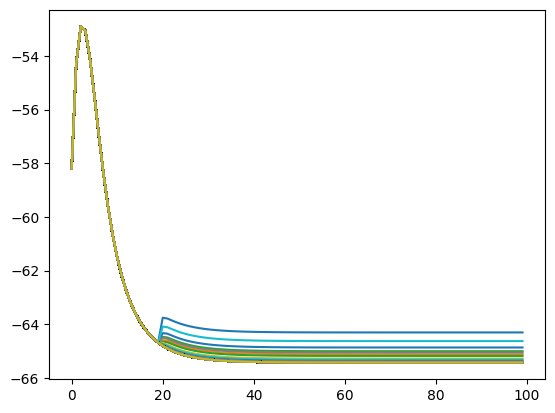

In [18]:
import matplotlib.pyplot as plt
t, v = H['time'], H['V']
t, v = np.array(t), np.array(v)
plt.plot(v)
plt.show()